Loading the Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Avail_hmeq.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### First understand the Dataset

In [0]:
df.shape

(5960, 13)

Data Type

In [0]:
df.dtypes.value_counts()

float64    9
object     2
int64      2
dtype: int64

In [0]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

Statistical values for dataset

In [0]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### **Target value**

As part of data, Target data set in 80/20 ratio. the dataset is **Imbalance.**

In [0]:
df["BAD"].value_counts(normalize=True)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

Later on in sheet we will use SMOTE oversampling method to balance out the data to get a better results from model.

## Pre porcessing and Understanding the data Features

**Missing value in the dataset **

In [0]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**Let's check categorial feature count wise**

In [0]:
df["REASON"].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [0]:
reason = df.groupby('REASON')
reason['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

**Comment**

loan do not seem to depend strongly on the REASON.

In [0]:
df["JOB"].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

**Comment**

Office worker and professional executives have the highest probability to pay their loans while sales and self employed have the highest probability to default. The occupation shows a good discriminating power and it will most likely be an important feature of our classification model


In [0]:
job = df.groupby('JOB')
job['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

later on for imputing missing value for above  **categorial features**  we will use most frequest ( Mode ) technique.

### Let's check the distribution of the features

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'YOJ')

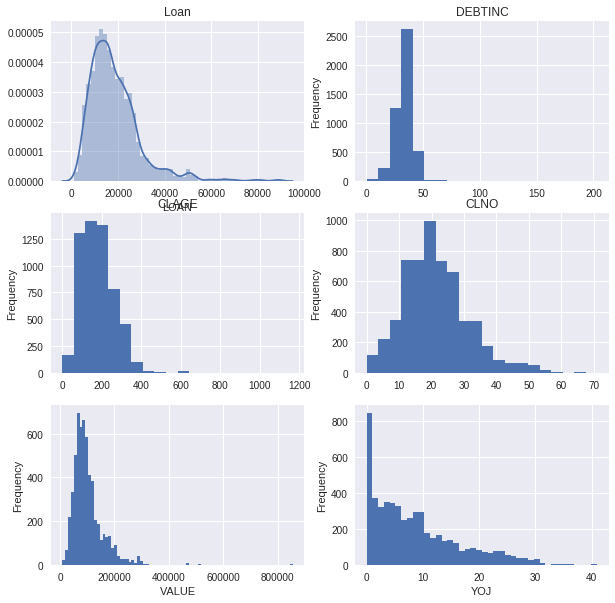

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.subplot(321)
ax1=sns.distplot(df['LOAN'])
ax1.set_title('Loan')
plt.subplot(322)
ax2=df["DEBTINC"].plot.hist(bins = 20)
ax2.set_title('DEBTINC')
plt.subplot(323)
ax3=df["CLAGE"].plot.hist(bins = 20)
ax3.set_title('CLAGE')
plt.subplot(324)
ax4=df["CLNO"].plot.hist(bins = 20)
ax4.set_title('CLNO')
plt.subplot(325)
ax5=df["VALUE"].plot.hist(bins = 80)
ax5.set_xlabel('VALUE')
plt.subplot(326)
ax6=df["YOJ"].plot.hist(bins = 40)
ax6.set_xlabel('YOJ')

**Comment**

We can use cappping technique to remobe extreme value and reshaping it to normal distribution.

'YOG' feature which is hight skewed we will transform it using log transformation.

'VALUE' and 'CLAG' feature value more than 400k and 500 respectively can be capped.

'CLNO' feature is centered around good distribution


### Imputation 

By understanding the distribution and box plot below we can take the decision for imputing missing value.

For Categorical feature we are using Mode(most frequent)  imputation menthod.

For Numerical feature we are going to use Mean( rest) and Median('for YOG') method

In [0]:
df["REASON"].fillna(value = "DebtCon",inplace = True)
df["JOB"].fillna(value = "Other",inplace = True)
df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)
df['YOJ'].fillna(value=df.median(),inplace=True)

In [0]:
df.fillna(value=df.mean(),inplace=True)

###Box plot visulization for Outlier and feature transformation

for capping feature as well as for outlier let's plot 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


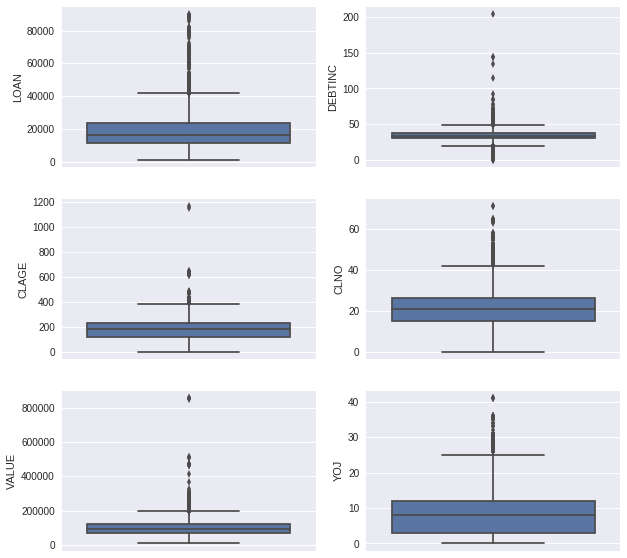

In [0]:
plt.figure(figsize=(10,10))
plt.subplot(321)
ax1=sns.boxplot(y=df['LOAN'])
#title('Loan')
plt.subplot(322)

ax2=sns.boxplot(y=df['DEBTINC'])
plt.subplot(323)

ax3=sns.boxplot(y=df['CLAGE'])
plt.subplot(324)

ax4=sns.boxplot(y=df['CLNO'])
plt.subplot(325)

ax5=sns.boxplot(y=df['VALUE'])
plt.subplot(326)

ax1=sns.boxplot(y=df['YOJ'])

Form above we can see quite a few feature have a little amount of outlier.

To improve model from outlier we are capping feature and further remove some as part of feature selection.

### **Feature transform**

In [0]:
df.loc[df["CLAGE"]>=500,"CLAGE"] = 500
df.loc[df["VALUE"]>=400000,"VALUE"] = 400000
df.loc[df["MORTDUE"]>=300000,"MORTDUE"] = 300000
df.loc[df["DEBTINC"]>=100,"DEBTINC"] = 100

Feature "YOG" have highly skewed as we have seen in distribution plot as we are using **box-cox transformation.**

In [0]:
df["YOJ"] = df["YOJ"].apply(lambda x: np.log(x+1))

In [0]:
#df['LTV']=df['LOAN']/df['VALUE']

In [0]:
#df.drop(['VALUE'], axis=1, inplace=True)

**One hot encoding for categorial feature**

In [0]:
df=pd.get_dummies(data=df, columns=['REASON', 'JOB'])
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp',
       'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales',
       'JOB_Self'],
      dtype='object')

### **Feature selection**

We will use the following for this purpose :

**Pearson correlation**

**chi square test **

### ** First plot Correlation matrix for numerical features**

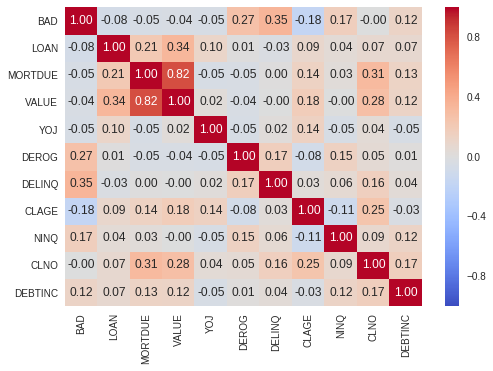

In [0]:
df1=df.loc[:, :'DEBTINC']
ax=sns.heatmap(df1.corr(),annot=True,fmt='0.2f',cmap='coolwarm')

As we can see 'VALUE',  'MORTDUE' are **highly correlated. we are removing** 'MORTDUE' from dataset

In [0]:
df.drop(['MORTDUE'], axis=1, inplace=True)

In [0]:
y = df['BAD']
df.drop(['BAD'], axis=1, inplace=True)

**Chi-Square based feature selection**

we will use Chi square base feature selection method for most important feature.

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


chi2_selector = SelectKBest(chi2, k=12)
X_kbest = chi2_selector.fit_transform(df,y)
df_chi = pd.DataFrame(X_kbest)
df_chi.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1100.0,39025.000000,2.442347,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0,0.0,0.0
1,1300.0,68400.000000,2.079442,0.0,2.0,121.833333,0.000000,33.779915,0.0,0.0,0.0,0.0
2,1500.0,16700.000000,1.609438,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0,0.0,0.0
3,1500.0,101776.048741,2.294782,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0,0.0,0.0
4,1700.0,112000.000000,1.386294,0.0,0.0,93.333333,0.000000,33.779915,1.0,0.0,0.0,0.0


We are choosing best 12 feature form chi square test.

**Later on we will use Model based most feature_importance  those will be part of feature selection.**

### Data Partition 

In [0]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(df_chi,y,test_size = .33,random_state=1)

for the training part of data set we can use oversampling method.

**SMOTE based oversampling technique**

As we have earlier seen data is **imbalance** so for some model pipe. it tries to give better results.

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_tr_sm, y_tr_sm = sm.fit_sample(x_tr, y_tr.ravel())

In [0]:
print("After OverSampling, counts of label '1': {}".format(sum(y_tr_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_tr_sm==0)))

After OverSampling, counts of label '1': 3210
After OverSampling, counts of label '0': 3210


**Now we have two kind of dataset-**

**1.Origional Imbalance dataset**

**2.SMOTE base oversampled dataset**

We will fit both kind of dataset over a model. which ever gives good result we will proceed for that part.

## **Model building and selection**

**Comment for model selection**

As we can see the dataset above we are able to convert feature in normal way and reduce the features. Earlier dataset consist a amont  of outliers, so not moving with SVM. 

We can go with logistic regression ,Tree based model and boosting algorithms

**1.Logistic Regression**

Here we are assuming a cutoff of 0.5 as threshold, once we able to select better model then we will play with probablity threshold.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


logreg = LogisticRegression()
logreg.fit(x_tr_sm,y_tr_sm)

y_pred_proba = logreg.predict_proba(x_te)
dum=pd.DataFrame(y_pred_proba[:,1])
print(dum.head(5))

y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)
print(cnf_matrix)
# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=["BAD"],
# title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

#plt.show()

          0
0  0.988859
1  0.146216
2  0.475800
3  0.083643
4  0.331319
accuracy score :  0.7707168276563294
f1 score :  0.6912318988126005
precision score :  0.6776673346389155
recall score :  0.7215920387019815
[[1257  304]
 [ 147  259]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression is giving better results **in case over-sampled data**. but **not as good as **upcomming model.

Logistic Regression got above results only after feature selection process.

## Comment on Accuracy Score selection

Generally Accuracy test can be used to evaluate algorithms. But in this case, using the MAJORITY CLASS(0) to predict the output will give high(79.2%) accuracy. but we would end up **PREDICTING ALL 1's AS O's INSTEAD**.

we want to decrease the number of **FN or FP** error as We predict that credit will be repaid but it actually being a fraudant one. as per busniess understanding we can tackle up with Recall or Precision optimization.

hence we will performance metrics must be used to evaluate the model. those would be
**F1 score , 
Recall ,
Precision **Confusion matrix parameter.

In [0]:
y_pred_proba = logreg.predict_proba(x_te)
from sklearn import metrics
from sklearn.metrics import roc_auc_score

preds = y_pred_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

print("ROC AUC score for model': {}".format(roc_auc))
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Decision Tree Model**

**Default assumption:**

**The threshold is defaultly set to .5 in these Models**

**Obviously,changing the threshold affects the performance of the model and this can be observed in the next section.** 

In [0]:
clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 10
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
print(cnf_matrix)


accuracy score :  0.8820538891713269
f1 score :  0.8040607846774248
precision score :  0.8376679189435337
recall score :  0.7808047449689632
[[1488   73]
 [ 159  247]]


**Decision Tree dominated over Logistic Regression**

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, min_samples_split=2, criterion='entropy', 
                               max_depth=None, bootstrap=True, max_features=9)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

x_tr,x_te,y_tr,y_te = train_test_split(scaled_data,y,test_size = .33,random_state=1)
random_forest.fit(x_tr, y_tr)

y_pred = random_forest.predict(x_te)
a = accuracy_score(y_te,y_pre)
f = f1_score(y_te, y_pre, average="macro")
p = precision_score(y_te, y_pre, average="macro")
r = recall_score(y_te, y_pre, average="macro")
#print("accuracy score : ",a)
print("f1 score : ",f)
print("precision score : ",p)
print("recall score : ",r)


cnf_matrix = confusion_matrix(y_te, y_pre)
print(cnf_matrix)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


f1 score :  0.8040607846774248
precision score :  0.8376679189435337
recall score :  0.7808047449689632
[[1488   73]
 [ 159  247]]


Here we are getting better results.

### Let's plot ROC For the same.

ROC AUC score for model': 0.9230788650700733


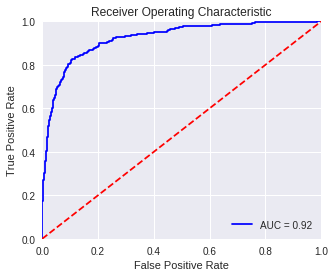

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
probs = random_forest.predict_proba(x_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

print("ROC AUC score for model': {}".format(roc_auc))
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-fold cross validation to improve performance of model.

In [0]:
from sklearn.model_selection import KFold,cross_val_score
#k_fold = KFold(len(y), n_splits=5, shuffle=True, random_state=0)
K=3
k_fold = KFold(n_splits = K, random_state = 0, shuffle = True)
#clf = RandomForestClassifier(n_estimators=est, min_samples_split=min_samples)
forest = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, min_samples_split=2, criterion='entropy', 
                               max_depth=None, bootstrap=True, max_features=9)
scoring = 'precision_macro'
results = cross_val_score(forest, df_chi, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(results)
print("Precision Score in 3 fold CV': {}".format(results.mean()))
results_1 = cross_val_score(forest, df_chi, y, cv=k_fold, n_jobs=1, scoring='recall_macro')
print("Recall Score in 3 fold CV': {}".format(results_1.mean()))

[0.84 0.84 0.85]
Precision Score in 3 fold CV': 0.8419494732464274
Recall Score in 3 fold CV': 0.7950440316391854


Slightly impove in score using k fold.

## Model over various threshold 

We can change the threshold of the model as per our busniess understanding and by looking precision recall score below.

In [0]:
forest.fit(x_tr,y_tr)
y_pred_proba = forest.predict_proba(x_te)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
recall,prec,acc=[],[],[]
for i in thresholds:
  y_test_predictions_high_recall = y_pred_proba[:,1] >= i
  cnf_matrix = confusion_matrix(y_te,y_test_predictions_high_recall)
  rec1 = recall_score(y_te, y_test_predictions_high_recall)
  recall.append(rec1)
  pres1=precision_score(y_te, y_test_predictions_high_recall)
  prec.append(pres1)
  acc.append(accuracy_score(y_te,y_test_predictions_high_recall))
  #print("Recall metric in the testing dataset: ",rec1)

dash=pd.DataFrame({'Threshold':thresholds,'Recall':recall,'Precision':prec, 'Accuracy':acc})
print(dash)

   Accuracy  Precision    Recall  Threshold
0  0.762583   0.462668  0.931034        0.1
1  0.860702   0.620879  0.834975        0.2
2  0.884596   0.704805  0.758621        0.3
3  0.891713   0.762943  0.689655        0.4
4  0.890696   0.819398  0.603448        0.5
5  0.882562   0.857143  0.517241        0.6
6  0.863244   0.874317  0.394089        0.7
7  0.845450   0.955357  0.263547        0.8
8  0.808338   1.000000  0.071429        0.9


The values of recall and accuracy vary with the threshold selected.

Based on the required accuracy and recall values , one has to decide and select a threshold.

**Plot the above collected data to visulize**

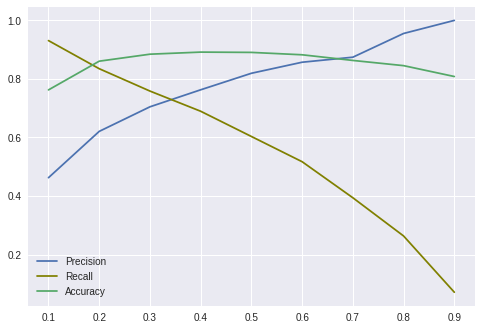

In [0]:
plt.plot( 'Threshold', 'Precision', data=dash)
plt.plot( 'Threshold', 'Recall', data=dash, color='olive')
plt.plot( 'Threshold', 'Accuracy', data=dash, )
plt.legend()

#ax = sns.lineplot(x='Threshold', y='Precision', data=dash)

from graph we can set optimum value of threshold as per requirement.

### Let's check with Light Boosting  LGB Model

In [0]:
import lightgbm as lgb
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

for i in range(2):
    
    # Split into training and validation set
    #train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(x_tr, y_tr, early_stopping_rounds=100, eval_set = [(x_te, y_te)], 
              eval_metric = 'auc', verbose = 200)
    

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.950434	valid_0's binary_logloss: 0.217307
Early stopping, best iteration is:
[195]	valid_0's auc: 0.950613	valid_0's binary_logloss: 0.216592
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.950434	valid_0's binary_logloss: 0.217307
Early stopping, best iteration is:
[195]	valid_0's auc: 0.950613	valid_0's binary_logloss: 0.216592


Whooaa!!

We can think for the LGB model also we good set of parameter and hyper parameter tuning.

**Comment**

Performance of the modeld mentioned can be **further improved**  as part of **Tuning Hyer-parameter** and a good Feature engineering as per understanding.

I am leaving that part as i am occupied with other activities and cetain time constraints.

Hopefully you like the rest part.

## Thanks